In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pro/res_apart_S3.csv')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21656 entries, 0 to 21655
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   preference            21656 non-null  object 
 1   description           21656 non-null  object 
 2   city                  21656 non-null  object 
 3   locality              21653 non-null  object 
 4   prop_name             21656 non-null  object 
 5   own_type              21656 non-null  object 
 6   #bedroom              21656 non-null  float64
 7   #balcony              16711 non-null  float64
 8   furnish               16031 non-null  object 
 9   facing                14704 non-null  object 
 10  possesion_age         21653 non-null  object 
 11  floor_num             21656 non-null  int64  
 12  #floors               21656 non-null  int64  
 13  area_in_sqft          21656 non-null  int64  
 14  price_per_sqft        21656 non-null  int64  
 15  price_in_lakh      

In [ ]:
df.isnull().sum()

preference                 0
description                0
city                       0
locality                   3
prop_name                  0
own_type                   0
#bedroom                   0
#balcony                4945
furnish                 5625
facing                  6952
possesion_age              3
floor_num                  0
#floors                    0
area_in_sqft               0
price_per_sqft             0
price_in_lakh              0
latitude                   0
longitude                  0
total_landmark_count     479
connectivity               0
hospital+pharmacy          0
religious_places           0
education                  0
banks                      0
shoppings                  0
office_complexes           0
luxury_score            5249
area_room_ratio            0
dtype: int64

# **Area VS Price**

<Axes: xlabel='area_in_sqft', ylabel='price_in_lakh'>

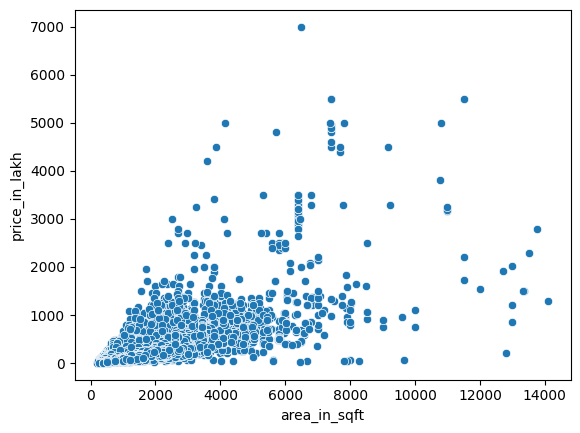

In [ ]:
sns.scatterplot(x=df['area_in_sqft'],y=df['price_in_lakh'])

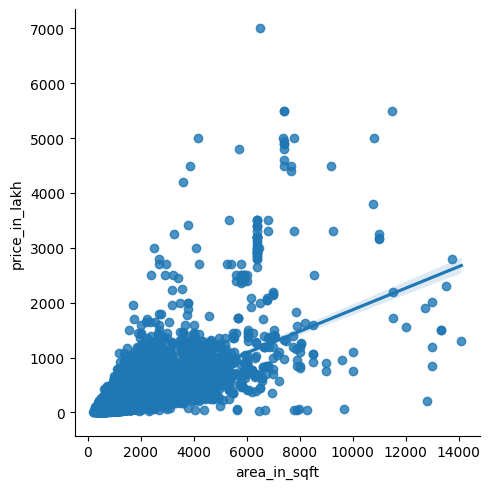

In [ ]:
sns.lmplot(data=df,x='area_in_sqft',y='price_in_lakh')

# **Facing**

<Axes: ylabel='count'>

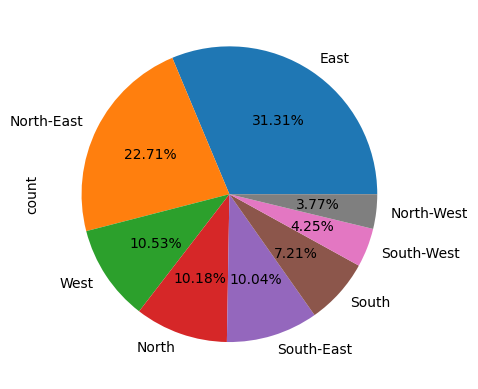

In [ ]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [ ]:
6952/df.shape[0]

0.32101957886959737

In [ ]:
temp_df = df[['facing','floor_num','price_in_lakh']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate the data into training and prediction sets
train_temp_df = temp_df[temp_df['facing'].notna()]
predict_temp_df = temp_df[temp_df['facing'].isna()]

# Features and target variable
X_train = train_temp_df.drop(columns='facing')
y_train = train_temp_df['facing']
X_predict = predict_temp_df.drop(columns='facing')

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict missing values
predictions = model.predict(X_predict)

# Fill missing values
temp_df.loc[temp_df['facing'].isna(), 'facing'] = predictions

<Axes: ylabel='count'>

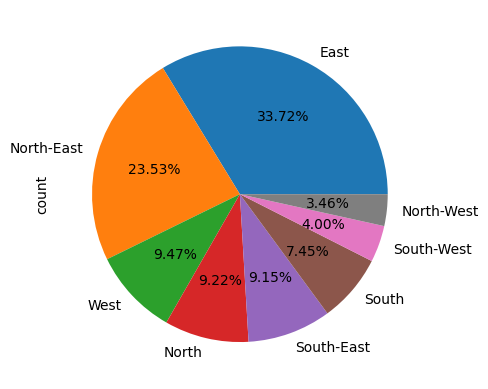

In [ ]:
temp_df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='facing', ylabel='price_in_lakh'>

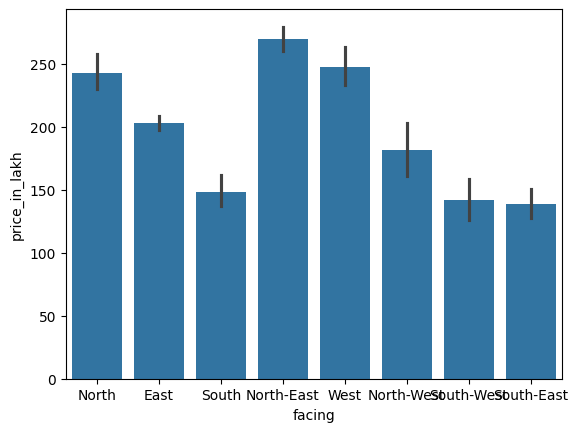

In [ ]:
sns.barplot(x='facing', y='price_in_lakh', data=temp_df, estimator=np.mean)

In [ ]:
from sklearn.impute import KNNImputer

# Convert categorical data to numerical for KNN
temp_df['facing'] = temp_df['facing'].astype('category').cat.codes
temp_df['facing'].replace(-1, np.nan, inplace=True)

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=2)
temp_df_imputed = pd.DataFrame(knn_imputer.fit_transform(temp_df), columns=temp_df.columns)

# Convert back to original categorical data
temp_df_imputed['facing'] = temp_df_imputed['facing'].round().astype(int).astype('category')

<ipython-input-18-54329a31ff39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['facing'] = temp_df['facing'].astype('category').cat.codes
<ipython-input-18-54329a31ff39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['facing'].replace(-1, np.nan, inplace=True)


<Axes: ylabel='count'>

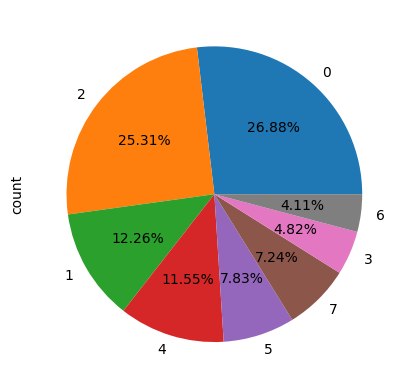

In [ ]:
temp_df_imputed['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='facing', ylabel='price_in_lakh'>

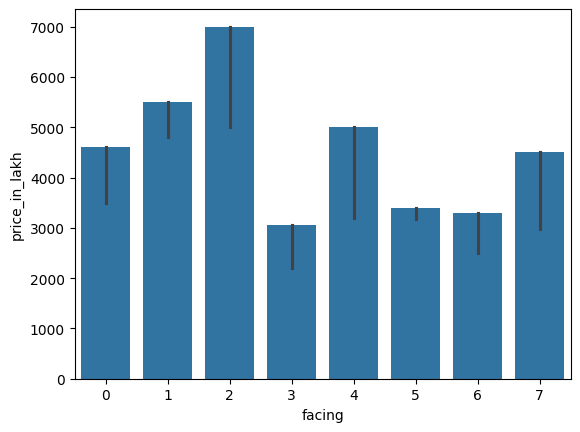

In [ ]:
sns.barplot(x='facing', y='price_in_lakh', data=temp_df_imputed, estimator=np.max)

In [ ]:
df.update(temp_df)

In [ ]:
df.isnull().sum()

preference                 0
description                0
city                       0
locality                   3
prop_name                  0
own_type                   0
#bedroom                   0
#balcony                4945
furnish                 5625
facing                     0
possesion_age              3
floor_num                  0
#floors                    0
area_in_sqft               0
price_per_sqft             0
price_in_lakh              0
latitude                   0
longitude                  0
total_landmark_count     479
connectivity               0
hospital+pharmacy          0
religious_places           0
education                  0
banks                      0
shoppings                  0
office_complexes           0
luxury_score            5249
area_room_ratio            0
dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df[df.locality.isnull()]

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score,area_room_ratio
6095,S,"Check out this 4 bhk apartment for sale in new launch sector 66, a popular residential project that houses in-Demand flats in gurgaon. This is a north-West-Facing property. Constructed on a super built up area of 3500 sq.Ft., the flat comprises 4 bedroom(s), 4 bathrooms and more than 3 balconies. This flat lies on the 10th level of a 34 storey building. This residential flat is currently under construction and you can expect the possession of the same by february 2025. The floor of this flat is beautifully designed using ceramic flooring, giving the flat an alluring look. The society is well equipped with many modern amenities, including visitor parking, lift(s), shopping centre, swimming pool, fitness centre / gym and water softening plant. The residential project is well equipped to meet all your water needs through access to municipal corporation and borewell/tank supply.",Gurgaon,NaN,new launch sector 66,Freehold,4.0,4.0,Unfurnished,North-West,Under Construction,10,34,3500,15937,510.0,77.02664,28.4595,NaN,0,0,0,0,0,0,0,94.0,875.00
6099,S,"Navraj antalya is one of the most popular destination for buying apartments/ flats in gurgaon. You too can be a part of this society by purchasing this 4 bhk flat here. The flat is facing the south-East direction. Constructed on a super built up area of 2058 sq.Ft., the flat comprises 4 bedroom(s), 4 bathrooms and more than 3 balconies. This flat lies on the 7th level of a 28 storey building. This residential property is still under construction and will be available for possession by february 2024. The well built ceramic flooring enhances the aesthetic appeal of this flat. The flat will offer a modern lifestyle as it is presented with many of the amenities such as visitor parking, lift(s), shopping centre, swimming pool, fitness centre / gym and club house / community center. The project provides a continuous supply of water to its flats.",Gurgaon,NaN,navraj antalya,Freehold,4.0,4.0,Semifurnished,South-East,Under Construction,7,28,2058,28008,512.0,77.02664,28.4595,NaN,0,0,0,0,0,0,0,95.0,514.50
6101,S,"Located in the popular residential address of gurgaon , navraj 37d is one of the most preferred destination for apartments in gurgaon. This 4 bhk flat is your ticket to be a part of this community. This residential flat is north-West-Facing direction. The flat occupies a super built up area of 2555 sq.Ft. That consists of 4 bedrooms, 4 bathrooms and more than 3 balconies. The flat has a total of 34 floors and this property is situated on 9th floor. Moreover, the flat is currently under construction and possession is expected by february 2025. The well built granite flooring enhances the aesthetic appeal of this flat. The society is well equipped with many modern amenities, including maintenance staff, lift(s), visitor parking, swimming pool, fitness centre / gym and shopping centre. The society provides continuous water supply from municipal corporation and borewell/tank.",Gurgaon,NaN,Navraj 37D,Freehold,4.0,4.0,Semifurnished,North-West,Under Construction,9,34,2555,12156,310.0,77.02664,28.4595,NaN,0,0,0,0,0,0,0,102.0,638.75


In [ ]:
df.drop(index=[6101,6099,6095],inplace=True)

# **Possesion_age**

In [ ]:
df.possesion_age.value_counts()

possesion_age
Under Construction        7481
1-5 Year Old Property     6373
0-1 Year Old Property     3939
5-10 Year Old Property    2476
10+ Year Old Property     1381
Name: count, dtype: int64

In [ ]:
df[df.possesion_age.isnull()]

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score,area_room_ratio
1035,S,"Primera are premium, airconditioned 3bhk apartments located in ramprastha city on the dwarka expressway. Primera boasts of superior construction quality, minimalistic architecture, and many ultra-Modern facilities. It carries forward ramprastha's legacy of providing luxury and quality homes at attractive prices.\n\nIt is located on a 24-Meter wide road with lay by lanes that provide a convenient entry to the residential towers. Its simplistic and straight-Line design makes it both, modern and timeless. Broad driveways, 3-Tier security, 24-Hour power backup and earthquake-Resistant buildings put primera at par with international living standards.\n\nPrimera is a self-Sustained complex offering numerous facilities that cater to a modern lifestyle with a clubhouse and a swimming pool.",Gurgaon,Sector 37D,Ramprastha Primera,Freehold,3.0,2.0,Semifurnished,East,NaN,3,22,3200,6875,220.00,28.451470,76.967280,10.0,3,1,0,2,0,2,1,71.0,1066.666667
5628,S,Signature global park is offering luxurious homes at sector 36 sohna gurgaon 2/3 bhk luxurious homes starting price 64 lakh with all facilities like video security. Club house . Swimming pool. Park. Indoor games. 24*7 security. Multipurpose hall this society is 20 min from rajiv chock 35 min from igi airpo,Gurgaon,Sohna,Signature Global Park,Freehold,2.0,3.0,Semifurnished,East,NaN,1,4,1020,5392,55.00,28.288317,77.066043,9.0,3,1,0,2,0,1,1,25.0,510.000000
19885,S,"Situated in manikonda, hyderabad, golden orchid is a well planned society that offers a pleasant living experience to its residents. This 3 bhk flat in hyderabad is your opportunity to be a part of this community. The flat is facing the east direction. Containing 3 bedroom(s), 3 bathrooms and 2 balconies, this flat is spread over a carpet area of 1510 sq.Ft. The property is located on the basement floor of a 5 floors tall building. The flat is currently under construction stage and you can expect to get the possession of the property by 2023. All the modern amenities such as maintenance staff and water softening plant will make life easier for you. The residential project is well equipped to meet all your water needs through access to borewell/tank supply.",Hyderabad,Manikonda,Aster,Freehold,3.0,2.0,Unfurnished,East,NaN,-2,6,1510,5800,87.58,17.401162,78.375690,50.0,0,13,8,0,4,0,0,25.0,503.333333


In [ ]:
df.drop(index=[19885,5628,1035],inplace=True)

In [ ]:
df.prop_name.value_counts().reset_index().sort_values(by='prop_name').sample(20)

,prop_name,count
1023,Pareena Rama Homes,4
2669,SRS Blue Heaven Bachupally,1
948,Gami Teesta,4
932,Spotlight Countryside,4
5537,Shivalik,1
4192,Lashkaria Green Height,1
5897,Mahamaya Apartment,1
5745,The Shraddha GS 47th Avenue,1
1467,Varun NMS 17 West,3
2360,Om Shivam Arjun,2


In [ ]:
df = df[df['locality'] != df['prop_name']]

In [ ]:
temp = df[df.prop_name.str.contains(',')]

In [ ]:
temp['prop_name'] = temp['prop_name'].str.split(',').str[0]

<ipython-input-72-268284f51e77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['prop_name'] = temp['prop_name'].str.split(',').str[0]


In [ ]:
df.update(temp)

In [ ]:
df[df.prop_name.str.contains(',')].shape

(0, 28)

# **Furnish**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pro/res_apart_S5.csv')

In [ ]:
df.furnish.isnull().sum()

5622

In [ ]:
df.furnish.fillna('Undefined',inplace=True)

<ipython-input-87-8e2672d78dd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.furnish.fillna('Undefined',inplace=True)


In [ ]:
df['furnish'].value_counts()

furnish
Unfurnished      9918
Semifurnished    7048
Undefined        3451
Furnished        1210
Name: count, dtype: int64

In [ ]:
def mode_based_imputation(row):
    if row['furnish'] == 'Undefined':
        mode_value = df[(df['locality'] == row['locality']) & (round(df['price_in_lakh']/100) == round(row['price_in_lakh']/100))]['furnish'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['furnish']

In [ ]:
df['furnish'] = df.apply(mode_based_imputation,axis=1)

<ipython-input-97-89a164cb43be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnish'] = df.apply(mode_based_imputation,axis=1)


In [ ]:
def mode_based_imputation2(row):
    if row['furnish'] == 'Undefined':
        mode_value = df[(df['locality'] == row['locality'])]['furnish'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['furnish']

In [ ]:
df['furnish'] = df.apply(mode_based_imputation2,axis=1)

<ipython-input-94-f51ce7f01d46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnish'] = df.apply(mode_based_imputation2,axis=1)


In [ ]:
df['furnish'].value_counts()

furnish
Unfurnished      9918
Semifurnished    7048
Undefined        3451
Furnished        1210
Name: count, dtype: int64

In [ ]:
temp_df = df[['furnish','price_in_lakh']]

In [ ]:
temp_df.furnish.replace('Undefined',np.NaN,inplace=True)

<ipython-input-6-27b012b1eb57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.furnish.replace('Undefined',np.NaN,inplace=True)


In [ ]:
temp_df.furnish.value_counts()

furnish
Unfurnished      9918
Semifurnished    7048
Furnished        1210
Name: count, dtype: int64

In [ ]:
temp_df.furnish.isnull().sum()

3451

In [ ]:
from sklearn.impute import KNNImputer

# Convert categorical data to numerical for KNN
temp_df['furnish'] = temp_df['furnish'].astype('category').cat.codes
temp_df['furnish'].replace(-1, np.nan, inplace=True)

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=2)
temp_df_imputed = pd.DataFrame(knn_imputer.fit_transform(temp_df), columns=temp_df.columns)

# Convert back to original categorical data
temp_df_imputed['furnish'] = temp_df_imputed['furnish'].round().astype(int).astype('category')

<ipython-input-9-2a9d4a0d8b56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['furnish'] = temp_df['furnish'].astype('category').cat.codes
<ipython-input-9-2a9d4a0d8b56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['furnish'].replace(-1, np.nan, inplace=True)


In [ ]:
temp_df_imputed['furnish'].value_counts()

furnish
2    11346
1     8771
0     1510
Name: count, dtype: int64

In [ ]:
temp_df_imputed.furnish.replace(0,'Furnished',inplace=True)

In [ ]:
temp_df_imputed.furnish.value_counts()

furnish
UnFurnished      11346
SemiFurnished     8771
Furnished         1510
Name: count, dtype: int64

In [ ]:
df.update(temp_df_imputed)

In [ ]:
df.isnull().sum()

preference                 0
description                0
city                       0
locality                   0
prop_name                  0
own_type                   0
#bedroom                   0
#balcony                4945
furnish                    0
facing                     0
possesion_age              0
floor_num                  0
#floors                    0
area_in_sqft               0
price_per_sqft             0
price_in_lakh              0
latitude                   0
longitude                  0
total_landmark_count     474
connectivity               0
hospital+pharmacy          0
religious_places           0
education                  0
banks                      0
shoppings                  0
office_complexes           0
luxury_score            5247
area_room_ratio            0
dtype: int64

In [ ]:
df[df.description.str.contains('bal') & df['#balcony'].isnull()].sample()

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score,area_room_ratio
9030,S,"The project offers 2 BHK apartments in Kolshet Road, Thane. These apartments have a carpet area, ranging from 522.05 sq. ft. to 580.6 sq. ft. and are available at a price range starting from Rs. 1.21 Crore to Rs. 1.33 Crore.\n\nIt is an under construction project, with 5 towers and features an array of facilities including a Waiting Lounge, Swimming Pool, Landscape Garden, Basketball Court, Multipurpose Hall. Lifts are available too.",Thane,Kolshet Road,Godrej Ascend,Freehold,2.0,NaN,Undefined,North,Under Construction,1,41,551,23042,127.0,19.22854,72.98312,10.0,5,1,0,2,0,1,1,NaN,275.5


In [ ]:
df[df.description.str.contains('amenities') & df['luxury_score'].isnull()].shape

(3605, 28)

In [ ]:
df[df.description.str.contains('amenities') & df['luxury_score'].isnull()].sample()

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score,area_room_ratio
13544,S,"Book a spectacular property in Solus that brings 4 BHK apartments in Madhyamgram, Kolkata North. We have a 4 BHK apartment with a super built-up area of 1528.0 sq. ft., available at an economical price of Rs. 76.06 Lac.\n\nA close attention has been paid to each detail for a comfortable living. There are 7 towers in Solus. Further, you can stay assured of Jacuzzi, Football, 24/7 Water Supply, Sun Deck, Swimming Pool, etc. Loaded with all the modern amenities, the project is certainly a steal deal.",Kolkata North,Madhyamgram,Solus,Freehold,4.0,NaN,Unfurnished,North,Under Construction,1,11,1528,4977,76.06,22.70124,88.47059,10.0,4,1,0,2,0,1,1,NaN,382.0


# **Balcony**

In [ ]:
df['#balcony'].value_counts()

#balcony
1.0    5881
2.0    3858
3.0    3146
4.0    2841
0.0     956
Name: count, dtype: int64

In [ ]:
temp_df = df[['#balcony','#bedroom','area_in_sqft','price_in_lakh']]

In [ ]:
from sklearn.impute import KNNImputer

# Convert categorical data to numerical for KNN
temp_df['#balcony'] = temp_df['#balcony'].astype('category').cat.codes
temp_df['#balcony'].replace(-1, np.nan, inplace=True)

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=2)
temp_df_imputed = pd.DataFrame(knn_imputer.fit_transform(temp_df), columns=temp_df.columns)

# Convert back to original categorical data
temp_df_imputed['#balcony'] = temp_df_imputed['#balcony'].round().astype(int).astype('category')

<ipython-input-156-df8722151999>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['#balcony'] = temp_df['#balcony'].astype('category').cat.codes
<ipython-input-156-df8722151999>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['#balcony'].replace(-1, np.nan, inplace=True)


In [ ]:
temp_df_imputed.isnull().sum()

#balcony         0
#bedroom         0
area_in_sqft     0
price_in_lakh    0
dtype: int64

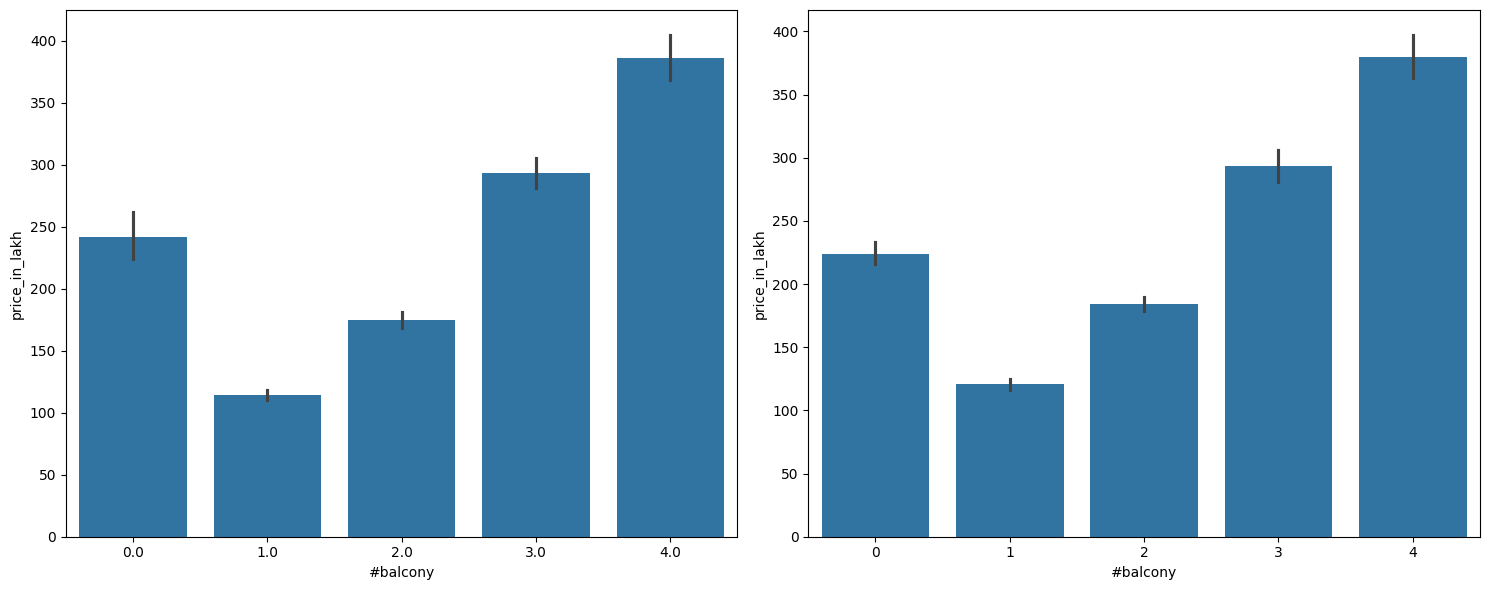

In [ ]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.barplot(x=df['#balcony'],y=df['price_in_lakh'])

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.barplot(x=temp_df_imputed['#balcony'],y=temp_df_imputed['price_in_lakh'])

plt.tight_layout()
plt.show()

In [ ]:
df.update(temp_df_imputed)

In [ ]:
df.isnull().sum()

preference                 0
description                0
city                       0
locality                   0
prop_name                  0
own_type                   0
#bedroom                   0
#balcony                   0
furnish                    0
facing                     0
possesion_age              0
floor_num                  0
#floors                    0
area_in_sqft               0
price_per_sqft             0
price_in_lakh              0
latitude                   0
longitude                  0
total_landmark_count     474
connectivity             474
hospital+pharmacy        474
religious_places         474
education                474
banks                    474
shoppings                474
office_complexes         474
luxury_score            5247
area_room_ratio            0
dtype: int64

In [ ]:
df.loc[df['total_landmark_count'].isnull(), 'office_complexes'] = np.NaN

In [ ]:
x_df = df.select_dtypes(include=['int64','float64'])

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=100)
x_df_values = imputer.fit_transform(x_df)
x_df = pd.DataFrame(x_df_values, columns=x_df.columns)

In [ ]:
x_df.isnull().sum()

#bedroom                0
#balcony                0
floor_num               0
#floors                 0
area_in_sqft            0
price_per_sqft          0
price_in_lakh           0
latitude                0
longitude               0
total_landmark_count    0
connectivity            0
hospital+pharmacy       0
religious_places        0
education               0
banks                   0
shoppings               0
office_complexes        0
luxury_score            0
area_room_ratio         0
dtype: int64

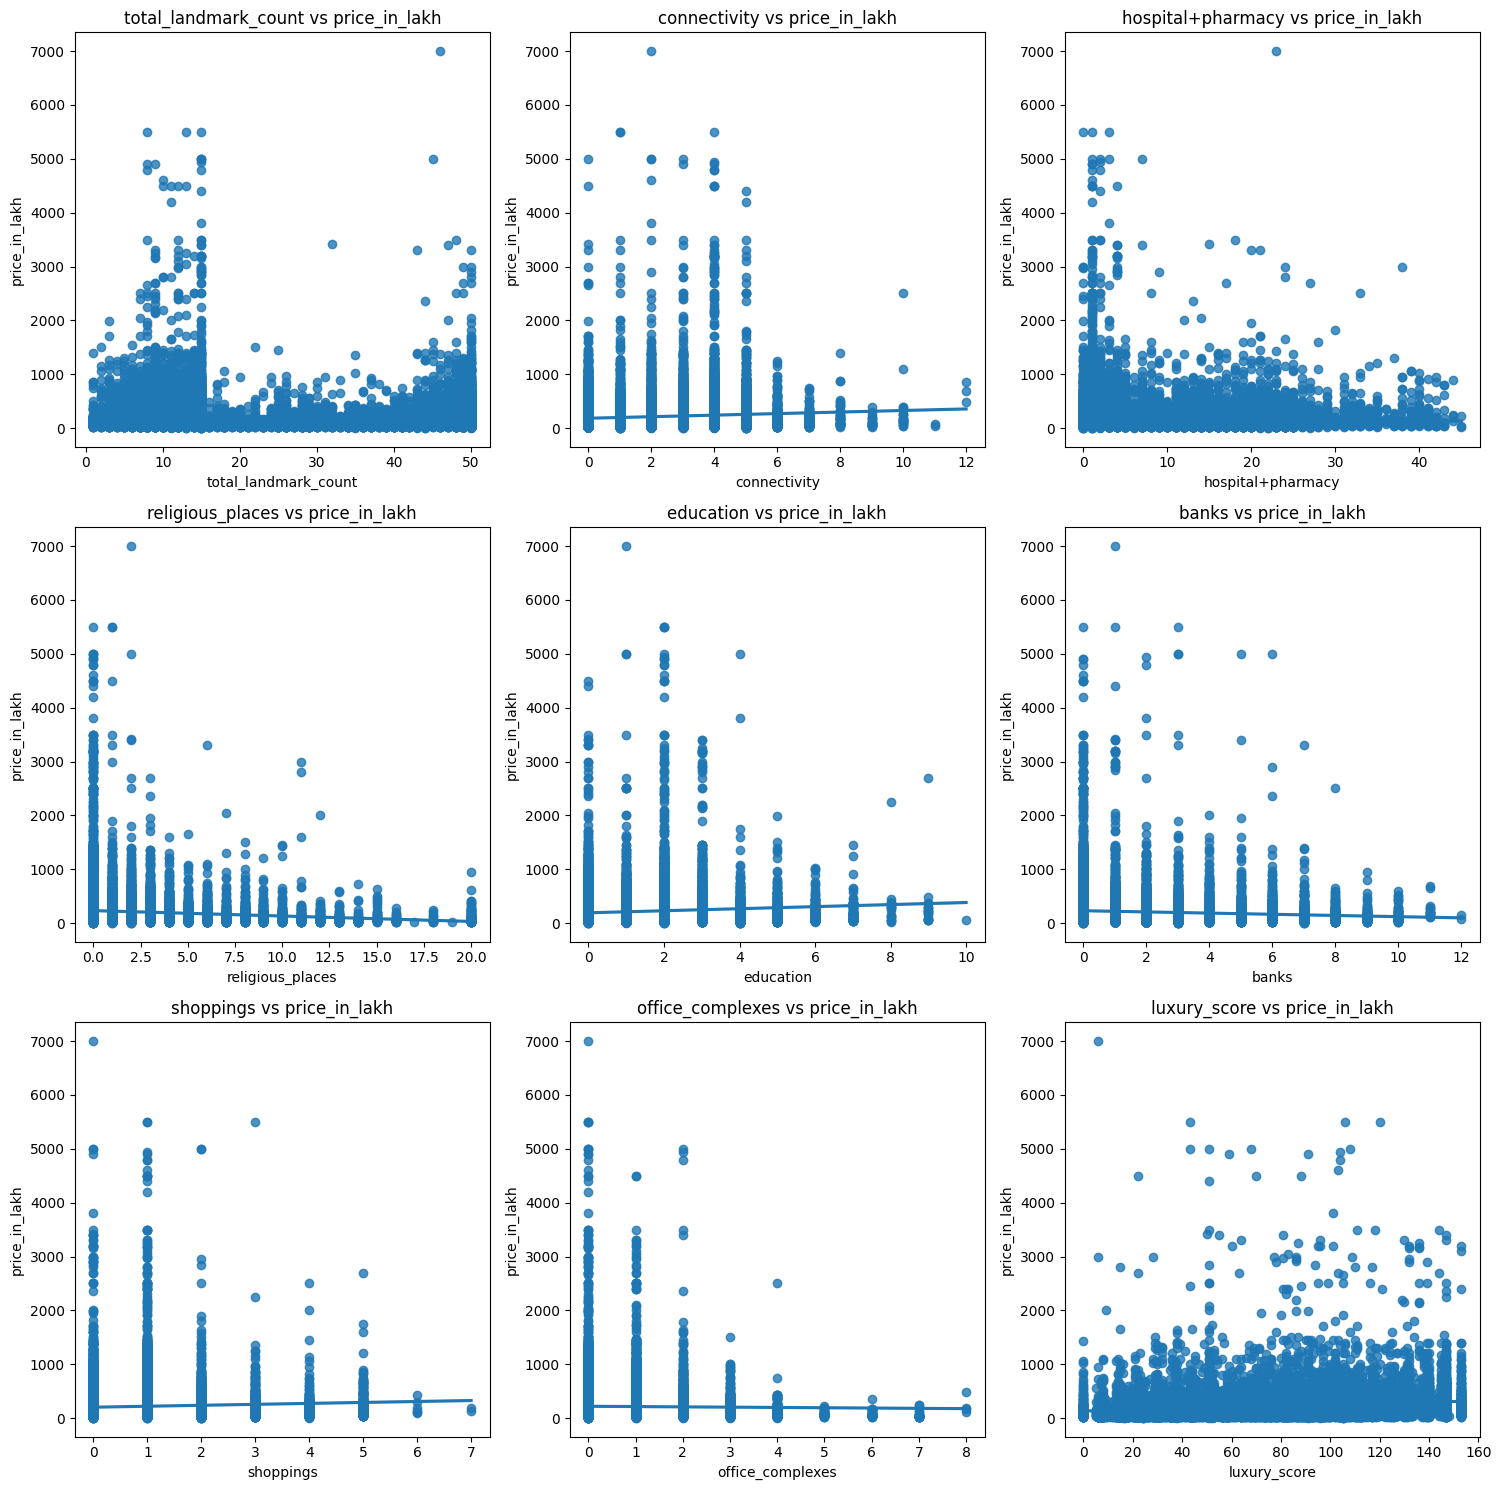

In [ ]:
# List of features to plot against 'price_in_lakh'
features = [
    'total_landmark_count', 'connectivity', 'hospital+pharmacy',
    'religious_places', 'education', 'banks', 'shoppings',
    'office_complexes', 'luxury_score'
]

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Loop through the features and create a regplot for each
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='price_in_lakh', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs price_in_lakh')

# Adjust layout
plt.tight_layout()
plt.show()

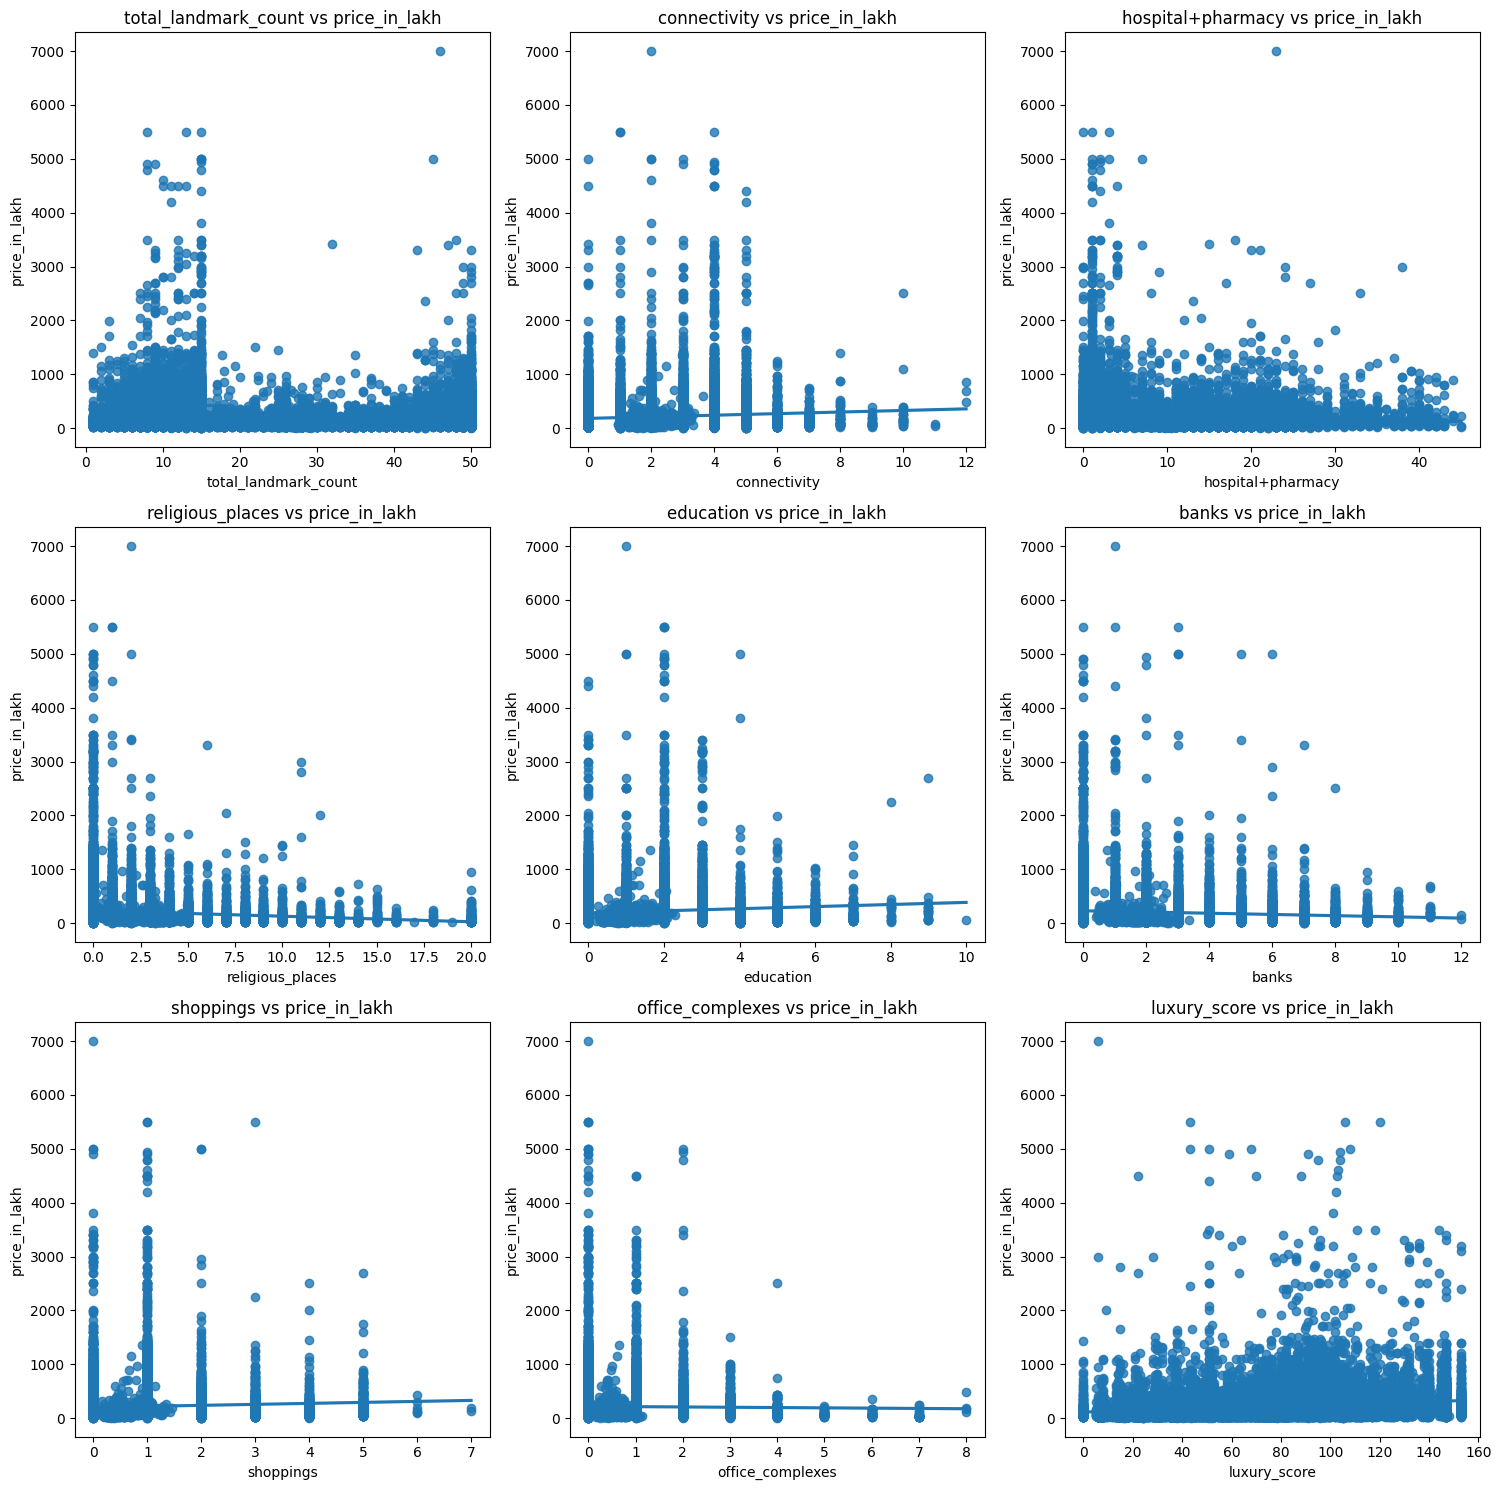

In [ ]:
# after imputing missing values
# List of features to plot against 'price_in_lakh'
features = [
    'total_landmark_count', 'connectivity', 'hospital+pharmacy',
    'religious_places', 'education', 'banks', 'shoppings',
    'office_complexes', 'luxury_score'
]

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Loop through the features and create a regplot for each
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='price_in_lakh', data=x_df, ax=axes[i])
    axes[i].set_title(f'{feature} vs price_in_lakh')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df.update(x_df)

In [ ]:
df.to_csv('/content/drive/MyDrive/pro/res_apart_S6.csv')